In [9]:
# required depdendencies - build-essential python 3.12 python3.12-dev
%pip install setuptools autodistill autodistill-grounded-sam autodistill-yolov8 roboflow

INFO: pip is looking at multiple versions of autodistill-yolov8 to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install autodistill-yolov8==0.0.5, autodistill-yolov8==0.1.0, autodistill-yolov8==0.1.1, autodistill-yolov8==0.1.2, autodistill-yolov8==0.1.3, autodistill-yolov8==0.1.4 and ultralytics==8.0.196 because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested ultralytics==8.0.196
    autodistill-yolov8 0.1.4 depends on ultralytics==8.0.81
    The user requested ultralytics==8.0.196
    autodistill-yolov8 0.1.3 depends on ultralytics==8.0.81
    The user requested ultralytics==8.0.196
    autodistill-yolov8 0.1.2 depends on ultralytics==8.0.81
    The user requested ultralytics==8.0.196
    autodistill-yolov8 0.1.1 depends on ultralytics==8.0.81
    The user requested ultralytics==8.0.196
    autodistill-yolov8 0.1.0 depends on ultralytics==8.0.81
    The user requested ultr

In [1]:
from autodistill_grounded_sam import GroundedSAM
from autodistill.detection import CaptionOntology
from autodistill_yolov8 import YOLOv8

# define an ontology to map class names to our GroundingDINO prompt
# the ontology dictionary has the format {caption: class}
# where caption is the prompt sent to the base model, and class is the label that will
# be saved for that caption in the generated annotations
base_model = GroundedSAM(ontology=CaptionOntology({"rabbit": "rabbit"}))


trying to load grounding dino directly


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)


final text_encoder_type: bert-base-uncased


In [ ]:

# label all images in a folder called `context_images` using GroundingSAM
base_model.label(
  input_folder="./images",
  output_folder="./labeled_data"
)

In [ ]:
# Train yolov8n pre-trained model with autolabeled data
target_model = YOLOv8("yolov8n.pt")
target_model.train("./labeled_data/data.yaml", epochs=200)

In [5]:
# (optional) Load pre-trained model with autolabeled data
from autodistill_yolov8 import YOLOv8Base
from autodistill.detection import CaptionOntology

target_model = YOLOv8Base(ontology=CaptionOntology({"rabbit": "rabbit"}), weights_path="./runs/detect/train/weights/best.pt")
print(target_model.ontology.classes())


['rabbit']



image 1/1 /home/saitcho/learn_autodistill/animals.v3i/valid/images/Image_58_jpg.rf.5db70d270195e43b09df0b4a61548df3.jpg: 640x640 1 rabbit, 5.1ms
Speed: 2.0ms preprocess, 5.1ms inference, 62.1ms postprocess per image at shape (1, 3, 640, 640)


Detections(xyxy=array([[     98.905,      43.625,      625.71,      632.74]], dtype=float32), mask=None, confidence=array([    0.92363], dtype=float32), class_id=array([0]), tracker_id=None, data={'class_name': array(['rabbit'], dtype='<U6')})


annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


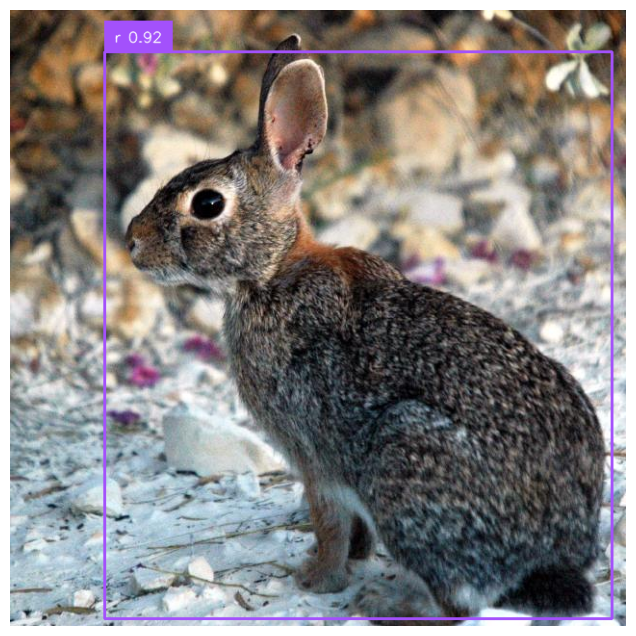

In [6]:
# Test trained model against an image

from autodistill.utils import plot
import cv2
image_path = "./animals.v3i/valid/images/Image_58_jpg.rf.5db70d270195e43b09df0b4a61548df3.jpg"
pred = target_model.predict(image_path)

print(pred)
plot(
    image=cv2.imread(image_path),
    detections=pred,
    classes="rabbit"
)

In [12]:
# optional: upload your model to Roboflow for deployment
from roboflow import Roboflow

rf = Roboflow(api_key="API_KEY")
project = rf.workspace().project("animals-7fizt")
project.version(3).deploy(model_type="yolov8", model_path=f"./runs/detect/train/")



loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.81, to fix: `pip install ultralytics==8.0.196`
View the status of your deployment at: https://app.roboflow.com/bunnyai/animals-7fizt/3
Share your model with the world at: https://universe.roboflow.com/bunnyai/animals-7fizt/model/3
